# Solana Validator Exploration

Initial Questions:

* How many validators have the Identity and Vote Account as the same pubkey?
* How many validators have open RPC (and potentially unauthenticated RPC ports?
* How many validators have different network addresses for gossip, tpu, and rpc?

In [115]:
import requests
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# https://docs.solana.com/cluster/rpc-endpoints#mainnet-beta
SOLANA_RPC_URL = "https://api.mainnet-beta.solana.com"

headers = {"Content-Type": "application/json"}
data = {"jsonrpc":"2.0", "id": 1}


In [3]:
def solana_rpc_call(headers, data):
    r = requests.post(SOLANA_RPC_URL, headers=headers, json=data)
    response_data = r.json()
    print(response_data)
    return response_data 


def getClusterNodes(data):
    """
docs: https://docs.solana.com/developing/clients/jsonrpc-api#getclusternodes

input: none

output:
pubkey: <string> - Node public key, as base-58 encoded string
gossip: <string | null> - Gossip network address for the node
tpu: <string | null> - TPU network address for the node
rpc: <string | null> - JSON RPC network address for the node, or null if the JSON RPC service is not enabled
version: <string | null> - The software version of the node, or null if the version information is not available
featureSet: <u32 | null > - The unique identifier of the node's feature set
shredVersion: <u16 | null> - The shred version the node has been configured to use


curl http://localhost:8899 -X POST -H "Content-Type: application/json" -d '
  {"jsonrpc":"2.0", "id":1, "method":"getClusterNodes"}
'
    """
    
    data["method"] = "getClusterNodes"
    return solana_rpc_call(headers, data)
    
    

In [4]:


def getVoteAccounts(data):
    """
docs: https://docs.solana.com/developing/clients/jsonrpc-api#getvoteaccounts

parameters:
<object> - (optional) Configuration object containing the following field:
(optional) Commitment
(optional) votePubkey: <string> - Only return results for this validator vote address (base-58 encoded)
(optional) keepUnstakedDelinquents: <bool> - Do not filter out delinquent validators with no stake
(optional) delinquentSlotDistance: <u64> - Specify the number of slots behind the tip that a validator must fall to be considered delinquent. NOTE: For the sake of consistency between ecosystem products, it is not recommended that this argument be specified.

output:
votePubkey: <string> - Vote account address, as base-58 encoded string
nodePubkey: <string> - Validator identity, as base-58 encoded string
activatedStake: <u64> - the stake, in lamports, delegated to this vote account and active in this epoch
epochVoteAccount: <bool> - bool, whether the vote account is staked for this epoch
commission: <number>, percentage (0-100) of rewards payout owed to the vote account
lastVote: <u64> - Most recent slot voted on by this vote account
epochCredits: <array> - History of how many credits earned by the end of each epoch, as an array of arrays containing: [epoch, credits, previousCredits]

    """

    data["method"] = "getVoteAccounts"
    return solana_rpc_call(headers, data)

    


In [5]:
clusterNodeResponse = getClusterNodes(data)

{'jsonrpc': '2.0', 'result': [{'featureSet': 2324890699, 'gossip': '93.187.216.169:8001', 'pubkey': 'CL8M3iQ624duoN9zFDXoZyvAmnFWXK7VR5uRQNmuETq9', 'rpc': None, 'shredVersion': 51382, 'tpu': '93.187.216.169:8004', 'version': '1.10.38'}, {'featureSet': 483097211, 'gossip': '141.95.35.125:8000', 'pubkey': 'GosJ8GHbSUunTQPY5xEyjhY2Eg5a9qSuPhNC4Ctztr7y', 'rpc': '141.95.35.125:8899', 'shredVersion': 51382, 'tpu': '141.95.35.125:8003', 'version': '1.10.35'}, {'featureSet': 2324890699, 'gossip': '65.108.69.27:8000', 'pubkey': 'HPdVgk7NhewBTKDCyqKYFXLu3pErnUo5W9KLSLd18JJv', 'rpc': None, 'shredVersion': 51382, 'tpu': '65.108.69.27:8003', 'version': '1.10.38'}, {'featureSet': 2324890699, 'gossip': '50.115.46.222:8001', 'pubkey': '51g6C9HjShJfNfT9vrmGZrooNjvvYpC56ARGRgSjAcfe', 'rpc': None, 'shredVersion': 51382, 'tpu': '50.115.46.222:8004', 'version': '1.10.38'}, {'featureSet': 2324890699, 'gossip': '65.108.128.185:8000', 'pubkey': '23SUe5fzmLws1M58AnGnvnUBRUKJmzCpnFQwv4M4b9Er', 'rpc': None, 'shr

In [6]:
voteAccountsResponse = getVoteAccounts(data)

{'jsonrpc': '2.0', 'result': {'current': [{'activatedStake': 73446663486029, 'commission': 10, 'epochCredits': [[340, 45888287, 45521127], [341, 46241605, 45888287], [342, 46626663, 46241605], [343, 46998050, 46626663], [344, 47239065, 46998050]], 'epochVoteAccount': True, 'lastVote': 148895631, 'nodePubkey': 'ALADNYWMtj2PhckortN2aSg63mKEyMN4bo7cw5iUAPXL', 'rootSlot': 148895599, 'votePubkey': 'J4ooR8AV8o5Ez2qN8ghQhR7YKhqRY5WEHfE8dTR2Yo6a'}, {'activatedStake': 72388508388639, 'commission': 10, 'epochCredits': [[340, 4837116, 4469504], [341, 5191096, 4837116], [342, 5576530, 5191096], [343, 5945923, 5576530], [344, 6194037, 5945923]], 'epochVoteAccount': True, 'lastVote': 148895631, 'nodePubkey': '7TtTkgBLiGEwWqCEx67PpgYgwRF8sL3yBmFRhQ3JY4rh', 'rootSlot': 148895599, 'votePubkey': 'HoZN2oWKh3bxzX1pdW3dPkFgpN7edabKCHSZSqiJnH9B'}, {'activatedStake': 94685038014065, 'commission': 10, 'epochCredits': [[340, 108737677, 108370147], [341, 109091258, 108737677], [342, 109476567, 109091258], [343,

In [7]:
def parseResponse(response):
    """
    
    """
    result = response.get('result', None)
    return result



In [8]:
voteAccountsResults = parseResponse(voteAccountsResponse)
voteAccountsResults['current']

[{'activatedStake': 73446663486029,
  'commission': 10,
  'epochCredits': [[340, 45888287, 45521127],
   [341, 46241605, 45888287],
   [342, 46626663, 46241605],
   [343, 46998050, 46626663],
   [344, 47239065, 46998050]],
  'epochVoteAccount': True,
  'lastVote': 148895631,
  'nodePubkey': 'ALADNYWMtj2PhckortN2aSg63mKEyMN4bo7cw5iUAPXL',
  'rootSlot': 148895599,
  'votePubkey': 'J4ooR8AV8o5Ez2qN8ghQhR7YKhqRY5WEHfE8dTR2Yo6a'},
 {'activatedStake': 72388508388639,
  'commission': 10,
  'epochCredits': [[340, 4837116, 4469504],
   [341, 5191096, 4837116],
   [342, 5576530, 5191096],
   [343, 5945923, 5576530],
   [344, 6194037, 5945923]],
  'epochVoteAccount': True,
  'lastVote': 148895631,
  'nodePubkey': '7TtTkgBLiGEwWqCEx67PpgYgwRF8sL3yBmFRhQ3JY4rh',
  'rootSlot': 148895599,
  'votePubkey': 'HoZN2oWKh3bxzX1pdW3dPkFgpN7edabKCHSZSqiJnH9B'},
 {'activatedStake': 94685038014065,
  'commission': 10,
  'epochCredits': [[340, 108737677, 108370147],
   [341, 109091258, 108737677],
   [342, 10947

In [9]:
clusterNodeResults = parseResponse(clusterNodeResponse)

In [10]:
clusterNodeDF = pd.DataFrame.from_dict(clusterNodeResults)
clusterNodeDF

,featureSet,gossip,pubkey,rpc,shredVersion,tpu,version
0,2.324891e+09,93.187.216.169:8001,CL8M3iQ624duoN9zFDXoZyvAmnFWXK7VR5uRQNmuETq9,None,51382,93.187.216.169:8004,1.10.38
1,4.830972e+08,141.95.35.125:8000,GosJ8GHbSUunTQPY5xEyjhY2Eg5a9qSuPhNC4Ctztr7y,141.95.35.125:8899,51382,141.95.35.125:8003,1.10.35
2,2.324891e+09,65.108.69.27:8000,HPdVgk7NhewBTKDCyqKYFXLu3pErnUo5W9KLSLd18JJv,None,51382,65.108.69.27:8003,1.10.38
3,2.324891e+09,50.115.46.222:8001,51g6C9HjShJfNfT9vrmGZrooNjvvYpC56ARGRgSjAcfe,None,51382,50.115.46.222:8004,1.10.38
4,2.324891e+09,65.108.128.185:8000,23SUe5fzmLws1M58AnGnvnUBRUKJmzCpnFQwv4M4b9Er,None,51382,65.108.128.185:8003,1.10.38
...,...,...,...,...,...,...,...
3481,NaN,13.251.180.208:8000,4kqYhtp25EYKYjoiV3b8QYvCyzVA4LtmGDmxBYu5DY1E,13.251.180.208:8899,51382,13.251.180.208:8003,None
3482,NaN,146.59.55.49:8000,FtZKT6QXMX5cqyVjmeRoykn978q2beBgxjoJmUXzX5YY,None,51382,None,None
3483,1.425681e+09,147.75.93.251:8001,EGs1teEXJXzAMUgFMz1aVHtPoHTz3g2RFXtBH5UEELRW,None,51382,None,1.10.28
3484,NaN,43.134.131.209:8000,AmZW2Ap7UTKhz7pRp2DPJ2Vqz7gxdC4tepxZmx8RT3yr,None,51382,None,None


In [11]:
voteAccountDF = pd.DataFrame.from_dict(voteAccountsResults['current'])
voteAccountDF.head()

,activatedStake,commission,epochCredits,epochVoteAccount,lastVote,nodePubkey,rootSlot,votePubkey
0,73446663486029,10,"[[340, 45888287, 45521127], [341, 46241605, 45...",True,148895631,ALADNYWMtj2PhckortN2aSg63mKEyMN4bo7cw5iUAPXL,148895599,J4ooR8AV8o5Ez2qN8ghQhR7YKhqRY5WEHfE8dTR2Yo6a
1,72388508388639,10,"[[340, 4837116, 4469504], [341, 5191096, 48371...",True,148895631,7TtTkgBLiGEwWqCEx67PpgYgwRF8sL3yBmFRhQ3JY4rh,148895599,HoZN2oWKh3bxzX1pdW3dPkFgpN7edabKCHSZSqiJnH9B
2,94685038014065,10,"[[340, 108737677, 108370147], [341, 109091258,...",True,148895631,4ULWSuaNnhQntP3DVxg1xa4yeNLNpDnAw3gTtrhPHzEA,148895599,G7akZgkcuqr7Vw1bHXqerKeawQ2Uc1WK9VaYq9APWNLE
3,1188759993476055,4,"[[340, 5309949, 4945566], [341, 5663406, 53099...",True,148895631,CXPeim1wQMkcTvEHx9QdhgKREYYJD8bnaCCqPRwJ1to1,148895599,J1to1yufRnoWn81KYg1XkTWzmKjnYSnmE2VY8DGUJ9Qv
4,65187742241739,10,"[[340, 22208106, 21843929], [341, 22557531, 22...",True,148895631,51ZywJopPJosXqbXahgYqz5ALPpi8v7PNrkzaKTLBRac,148895599,7ijG5keU7kjADTaXxoanvfy6pbWxWq2aQ5p17VdK9fDQ


In [12]:
clusterNodeDF.rename(columns = {'pubkey': 'nodePubkey'}, inplace = True)
voteAccountDF_join_clusterNodeDF = pd.merge(voteAccountDF, clusterNodeDF, on = "nodePubkey")
voteAccountDF_join_clusterNodeDF.head()

,activatedStake,commission,epochCredits,epochVoteAccount,lastVote,nodePubkey,rootSlot,votePubkey,featureSet,gossip,rpc,shredVersion,tpu,version
0,73446663486029,10,"[[340, 45888287, 45521127], [341, 46241605, 45...",True,148895631,ALADNYWMtj2PhckortN2aSg63mKEyMN4bo7cw5iUAPXL,148895599,J4ooR8AV8o5Ez2qN8ghQhR7YKhqRY5WEHfE8dTR2Yo6a,4.830972e+08,144.76.92.110:8000,None,51382,144.76.92.110:8003,1.10.34
1,72388508388639,10,"[[340, 4837116, 4469504], [341, 5191096, 48371...",True,148895631,7TtTkgBLiGEwWqCEx67PpgYgwRF8sL3yBmFRhQ3JY4rh,148895599,HoZN2oWKh3bxzX1pdW3dPkFgpN7edabKCHSZSqiJnH9B,2.324891e+09,208.73.205.238:10001,None,51382,208.73.205.238:10004,1.10.38
2,94685038014065,10,"[[340, 108737677, 108370147], [341, 109091258,...",True,148895631,4ULWSuaNnhQntP3DVxg1xa4yeNLNpDnAw3gTtrhPHzEA,148895599,G7akZgkcuqr7Vw1bHXqerKeawQ2Uc1WK9VaYq9APWNLE,2.324891e+09,65.21.236.104:8001,None,51382,65.21.236.104:8004,1.10.38
3,1188759993476055,4,"[[340, 5309949, 4945566], [341, 5663406, 53099...",True,148895631,CXPeim1wQMkcTvEHx9QdhgKREYYJD8bnaCCqPRwJ1to1,148895599,J1to1yufRnoWn81KYg1XkTWzmKjnYSnmE2VY8DGUJ9Qv,2.324891e+09,145.40.95.129:8000,None,51382,145.40.93.37:8003,1.10.39
4,65187742241739,10,"[[340, 22208106, 21843929], [341, 22557531, 22...",True,148895631,51ZywJopPJosXqbXahgYqz5ALPpi8v7PNrkzaKTLBRac,148895599,7ijG5keU7kjADTaXxoanvfy6pbWxWq2aQ5p17VdK9fDQ,2.324891e+09,65.109.26.222:8000,None,51382,65.109.26.222:8003,1.10.38


In [13]:

voteAccountDF_join_clusterNodeDF['pubkey_diff'] = np.where((voteAccountDF_join_clusterNodeDF['nodePubkey'] == voteAccountDF_join_clusterNodeDF['votePubkey'] ), True, False)
same_key_mask = voteAccountDF_join_clusterNodeDF['pubkey_diff'].values == True

same_key_df = voteAccountDF_join_clusterNodeDF[same_key_mask]
same_key_df

,activatedStake,commission,epochCredits,epochVoteAccount,lastVote,nodePubkey,rootSlot,votePubkey,featureSet,gossip,rpc,shredVersion,tpu,version,pubkey_diff


In [14]:
rpc_address_mask = voteAccountDF_join_clusterNodeDF['rpc'].values != None
rpc_address_df = voteAccountDF_join_clusterNodeDF[rpc_address_mask]
rpc_address_df.head()

,activatedStake,commission,epochCredits,epochVoteAccount,lastVote,nodePubkey,rootSlot,votePubkey,featureSet,gossip,rpc,shredVersion,tpu,version,pubkey_diff
18,85839031041524,10,"[[340, 21053366, 20689023], [341, 21402443, 21...",True,148895631,6v7MhzPAcdcpx9LvtE25LQNMAzrBwN7e8FDUaH6EF8gL,148895599,5wacKbXahnCfRFwNwJT7ynyvRTmyHuqwvPvKspmgVcip,2.324891e+09,66.45.255.110:8000,66.45.255.110:8899,51382,66.45.255.110:8003,1.10.38,False
29,73001889208987,10,"[[340, 18523876, 18156408], [341, 18876987, 18...",True,148895630,FzKYWBEcKSzFRJxWBJp9tcreAdrDFk22Jxx1zPxMfG8e,148895598,Fuuuh3UhCSF7Ykv4LBQgAusMQtjkM8Ho8k9rWcCqGtb4,2.324891e+09,51.195.234.236:8000,51.195.234.236:8899,51382,51.195.234.236:8003,1.10.38,False
30,4520968340001685,10,"[[340, 119101938, 118734028], [341, 119455255,...",True,148895631,Certusm1sa411sMpV9FPqU5dXAYhmmhygvxJ23S6hJ24,148895599,CertusDeBmqN8ZawdkxK5kFGMwBXdudvWHYwtNgNhvLu,4.830972e+08,85.190.150.166:8000,85.190.150.166:8899,51382,85.190.150.166:8003,1.10.35,False
32,72690866266544,10,"[[340, 15448720, 15081185], [341, 15799568, 15...",True,148895631,YuRBAsy9Stw1u46A8dMp7WQVBFweLP1PKuYibzYAMmQ,148895599,ARrmrz549nPaS1ypzb4J6jcqRx8tJM1jdK5Lgm7q4chV,2.324891e+09,141.95.203.81:8001,141.95.203.81:8899,51382,141.95.203.81:8003,1.10.38,False
55,2809003756991489,100,"[[340, 9456917, 9093095], [341, 9810888, 94569...",True,148895631,FBKFWadXZJahGtFitAsBvbqh5968gLY7dMBBJUoUjeNi,148895599,AZoCYB4VgoM9DR9f1ZFcBn8xPSbtbqoxZnKJR7tkvEoX,4.830972e+08,54.154.5.73:11000,54.154.5.73:8899,51382,54.154.5.73:11003,1.10.35,False


In [15]:
total_delinquent_validators = len(voteAccountsResults['delinquent'])

In [16]:
total_current_validators = len(voteAccountsResults['current'])

In [17]:
num_validators_with_rpc = rpc_address_df.shape[0]

In [18]:
percent_validators_with_rpc = (num_validators_with_rpc / total_current_validators ) * 100
print(f"Percentage of Validators with RPC Enabled: {percent_validators_with_rpc:.2f}%")

Percentage of Validators with RPC Enabled: 14.24%


In [19]:
def get_ip_information(network_addr):
    
    
    url = "https://ipapi.co"
    ip = parse_ip(network_addr)
    req_url = f"{url}/{ip}/json/"
    
    r = requests.get(req_url).json()
    ip_information = (
        ip,
        r.get("asn"),
        r.get("org"),
        r.get("country"),
        r.get("longitude"),
        r.get("latitude")
    )
    return ip_information

def get_ip_information_dict(network_addr):
    
    
    url = "https://ipapi.co"
    ip = parse_ip(network_addr)
    if ip is None:
        return { "ip": None, "asn": None, "org": None, "country": None,"longitude": None, "latitude": None}
    
    req_url = f"{url}/{ip}/json/"
    
    r = requests.get(req_url).json()
    ip_information = {
        "ip": ip,
        "asn": r.get("asn", None),
        "org": r.get("org", None),
        "country": r.get("country", None),
        "longitude": r.get("longitude", None),
        "latitude": r.get("latitude", None)
    }
    return ip_information

def parse_ip(network_addr):
    """
    > parse_ip("198.244.213.77:8000")
    "198.244.213.77"
    
    """
    if network_addr is None:
        return None
    return network_addr.split(':')[0]

print(get_ip_information('8.8.8.8'))
print(parse_ip("198.244.213.77:8000"))

def print_row(item):
    return {'this': item}

('8.8.8.8', None, None, None, None, None)
198.244.213.77


In [43]:
sol_df = voteAccountDF_join_clusterNodeDF
#sol_df['ip'], sol_df['asn'],  sol_df['org'],  sol_df['country'],  sol_df['longitude'],  sol_df['latitude']   = zip(*sol_df['tpu'].map(get_ip_information) )


In [44]:
sol_df.head()

,activatedStake,commission,epochCredits,epochVoteAccount,lastVote,nodePubkey,rootSlot,votePubkey,featureSet,gossip,rpc,shredVersion,tpu,version,pubkey_diff
0,71760404895589,10,"[[340, 9633845, 9266849], [341, 9987340, 96338...",True,148881372,J94LZfHpTseinona9UMTDFPLAGND7FQvGkEYBNTgkKZ6,148881340,cY7sHgqa2BhjPs5RVwUDkR92uHmP36H2MmjEMGwvnNY,2.324891e+09,198.244.213.77:8000,198.244.213.77:8899,51382,198.244.213.77:8003,1.10.38,False
1,85406114118681,10,"[[340, 16181068, 15813887], [341, 16534884, 16...",True,148881372,UUcsYKGXbrecWLTNn4LK1N21Px1Ra5c3VsFJzAtzZPk,148881340,Agsu9fcnH3rKBix59mktDRqJhjR8aStgLDd9njaddcdr,4.830972e+08,172.93.111.204:8000,None,51382,172.93.111.204:8003,1.10.34,False
2,72923480364270,10,"[[340, 35159422, 34792169], [341, 35512814, 35...",True,148881372,85VMKWwYmCdZ9mCbcRNeUMeCmNSSwaKFgcwBWkwJTBWT,148881340,56aneAqRs7zWRckhf5NUy8wfwXUjkVY8Zs3LM38zJ8TY,2.324891e+09,135.181.57.114:8001,None,51382,135.181.57.114:8004,1.10.38,False
3,73447307774801,10,"[[340, 48099693, 47734573], [341, 48451916, 48...",True,148881372,FJJUDYRPUVa1fqXBiW7bxwWNBpJnvH1PATRodTygBWpy,148881340,6EftrAURp1rwpmy7Jeqem4kwWYeSnKmgYWKbdX5gEBHQ,4.830972e+08,51.222.248.152:8001,None,51382,51.222.248.152:8004,1.10.35,False
4,110428997513,10,"[[319, 56241117, 55914376], [320, 56241119, 56...",True,148881372,H5FD5GxuE46hqi5paMkcqt9WeHvszZA7RgBfMoMpfNDK,148881340,FK466vE8ZPSuntKFT415H16qRJ26UPzmXZXb3jq42jaE,4.830972e+08,198.55.56.166:14200,198.55.56.166:14000,51382,198.55.56.166:14102,1.10.35,False


In [57]:
applied_df = sol_df.apply(lambda row: get_ip_information_dict(row['tpu']), axis='columns', result_type='expand')
applied_df.head()

,ip,asn,org,country,longitude,latitude
0,198.244.213.77,AS16276,OVH SAS,GB,-0.0930,51.5164
1,172.93.111.204,AS23470,RELIABLESITE,US,-80.1828,25.9562
2,135.181.57.114,AS24940,Hetzner Online GmbH,FI,24.9347,60.1719
3,51.222.248.152,AS16276,OVH SAS,CA,-73.8736,45.3161
4,198.55.56.166,AS12212,RAVAND,CA,-79.4959,43.6830


In [59]:
applied_df.head()

,ip,asn,org,country,longitude,latitude
0,198.244.213.77,AS16276,OVH SAS,GB,-0.0930,51.5164
1,172.93.111.204,AS23470,RELIABLESITE,US,-80.1828,25.9562
2,135.181.57.114,AS24940,Hetzner Online GmbH,FI,24.9347,60.1719
3,51.222.248.152,AS16276,OVH SAS,CA,-73.8736,45.3161
4,198.55.56.166,AS12212,RAVAND,CA,-79.4959,43.6830


In [63]:
sol_df = pd.concat([sol_df, applied_df], axis='columns')
sol_df.head()

,activatedStake,commission,epochCredits,epochVoteAccount,lastVote,nodePubkey,rootSlot,votePubkey,featureSet,gossip,...,org,country,longitude,latitude,ip,asn,org,country,longitude,latitude
0,71760404895589,10,"[[340, 9633845, 9266849], [341, 9987340, 96338...",True,148881372,J94LZfHpTseinona9UMTDFPLAGND7FQvGkEYBNTgkKZ6,148881340,cY7sHgqa2BhjPs5RVwUDkR92uHmP36H2MmjEMGwvnNY,2.324891e+09,198.244.213.77:8000,...,OVH SAS,GB,-0.0930,51.5164,198.244.213.77,AS16276,OVH SAS,GB,-0.0930,51.5164
1,85406114118681,10,"[[340, 16181068, 15813887], [341, 16534884, 16...",True,148881372,UUcsYKGXbrecWLTNn4LK1N21Px1Ra5c3VsFJzAtzZPk,148881340,Agsu9fcnH3rKBix59mktDRqJhjR8aStgLDd9njaddcdr,4.830972e+08,172.93.111.204:8000,...,RELIABLESITE,US,-80.1828,25.9562,172.93.111.204,AS23470,RELIABLESITE,US,-80.1828,25.9562
2,72923480364270,10,"[[340, 35159422, 34792169], [341, 35512814, 35...",True,148881372,85VMKWwYmCdZ9mCbcRNeUMeCmNSSwaKFgcwBWkwJTBWT,148881340,56aneAqRs7zWRckhf5NUy8wfwXUjkVY8Zs3LM38zJ8TY,2.324891e+09,135.181.57.114:8001,...,Hetzner Online GmbH,FI,24.9347,60.1719,135.181.57.114,AS24940,Hetzner Online GmbH,FI,24.9347,60.1719
3,73447307774801,10,"[[340, 48099693, 47734573], [341, 48451916, 48...",True,148881372,FJJUDYRPUVa1fqXBiW7bxwWNBpJnvH1PATRodTygBWpy,148881340,6EftrAURp1rwpmy7Jeqem4kwWYeSnKmgYWKbdX5gEBHQ,4.830972e+08,51.222.248.152:8001,...,OVH SAS,CA,-73.8736,45.3161,51.222.248.152,AS16276,OVH SAS,CA,-73.8736,45.3161
4,110428997513,10,"[[319, 56241117, 55914376], [320, 56241119, 56...",True,148881372,H5FD5GxuE46hqi5paMkcqt9WeHvszZA7RgBfMoMpfNDK,148881340,FK466vE8ZPSuntKFT415H16qRJ26UPzmXZXb3jq42jaE,4.830972e+08,198.55.56.166:14200,...,RAVAND,CA,-79.4959,43.6830,198.55.56.166,AS12212,RAVAND,CA,-79.4959,43.6830


In [92]:
#save_point
#sol_df.to_pickle("sol_df.pkl")
# load pickle with
sol_df = pd.read_pickle("sol_df.pkl")
sol_df.head()

,activatedStake,commission,epochCredits,epochVoteAccount,lastVote,nodePubkey,rootSlot,votePubkey,featureSet,gossip,...,org,country,longitude,latitude,ip,asn,org,country,longitude,latitude
0,71760404895589,10,"[[340, 9633845, 9266849], [341, 9987340, 96338...",True,148881372,J94LZfHpTseinona9UMTDFPLAGND7FQvGkEYBNTgkKZ6,148881340,cY7sHgqa2BhjPs5RVwUDkR92uHmP36H2MmjEMGwvnNY,2.324891e+09,198.244.213.77:8000,...,OVH SAS,GB,-0.0930,51.5164,198.244.213.77,AS16276,OVH SAS,GB,-0.0930,51.5164
1,85406114118681,10,"[[340, 16181068, 15813887], [341, 16534884, 16...",True,148881372,UUcsYKGXbrecWLTNn4LK1N21Px1Ra5c3VsFJzAtzZPk,148881340,Agsu9fcnH3rKBix59mktDRqJhjR8aStgLDd9njaddcdr,4.830972e+08,172.93.111.204:8000,...,RELIABLESITE,US,-80.1828,25.9562,172.93.111.204,AS23470,RELIABLESITE,US,-80.1828,25.9562
2,72923480364270,10,"[[340, 35159422, 34792169], [341, 35512814, 35...",True,148881372,85VMKWwYmCdZ9mCbcRNeUMeCmNSSwaKFgcwBWkwJTBWT,148881340,56aneAqRs7zWRckhf5NUy8wfwXUjkVY8Zs3LM38zJ8TY,2.324891e+09,135.181.57.114:8001,...,Hetzner Online GmbH,FI,24.9347,60.1719,135.181.57.114,AS24940,Hetzner Online GmbH,FI,24.9347,60.1719
3,73447307774801,10,"[[340, 48099693, 47734573], [341, 48451916, 48...",True,148881372,FJJUDYRPUVa1fqXBiW7bxwWNBpJnvH1PATRodTygBWpy,148881340,6EftrAURp1rwpmy7Jeqem4kwWYeSnKmgYWKbdX5gEBHQ,4.830972e+08,51.222.248.152:8001,...,OVH SAS,CA,-73.8736,45.3161,51.222.248.152,AS16276,OVH SAS,CA,-73.8736,45.3161
4,110428997513,10,"[[319, 56241117, 55914376], [320, 56241119, 56...",True,148881372,H5FD5GxuE46hqi5paMkcqt9WeHvszZA7RgBfMoMpfNDK,148881340,FK466vE8ZPSuntKFT415H16qRJ26UPzmXZXb3jq42jaE,4.830972e+08,198.55.56.166:14200,...,RAVAND,CA,-79.4959,43.6830,198.55.56.166,AS12212,RAVAND,CA,-79.4959,43.6830


In [94]:
# duplicates entered from zip/map
sol_df = sol_df.loc[:, ~sol_df.columns.duplicated()].copy()

In [95]:
print(sol_df[["country", "org"]].describe())
org = sol_df["org"]
print()
print("Organization Distribution Stats")
print(org.value_counts(normalize=True).nlargest(10))
print()
print("Country Distribution Stats")
print(sol_df.country.value_counts(normalize=True).nlargest(10))


       country                  org
count      283                  283
unique      19                   35
top         DE  Hetzner Online GmbH
freq        75                  103

Organization Distribution Stats
Hetzner Online GmbH       0.363958
OVH SAS                   0.233216
RELIABLESITE              0.070671
WEBNX                     0.060071
PACKET                    0.042403
IS-AS-1                   0.028269
Meverywhere sp. z o.o.    0.024735
TERASWITCH                0.017668
Scalaxy B.V.              0.017668
OOO NIIR-RadioNet         0.014134
Name: org, dtype: float64

Country Distribution Stats
DE    0.265018
US    0.204947
FI    0.151943
FR    0.127208
GB    0.049470
PL    0.042403
CA    0.042403
NL    0.031802
RU    0.024735
UA    0.010601
Name: country, dtype: float64


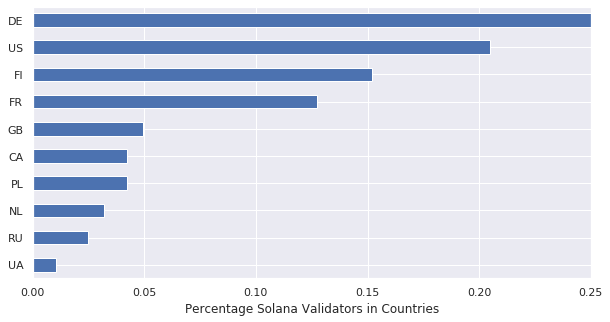

In [102]:
# https://stackoverflow.com/questions/19555525
# help saving images
f, ax = plt.subplots(figsize=(10, 5))
plot = sol_df["country"].value_counts(normalize=True).nlargest(10).sort_values().plot.barh()
ax.set(xlim=(0, .25),ylabel="",
       xlabel="Percentage Solana Validators in Countries")
fig = plot.get_figure()
fig.savefig("figures/Solana-Validator-Node-Distribution.png")

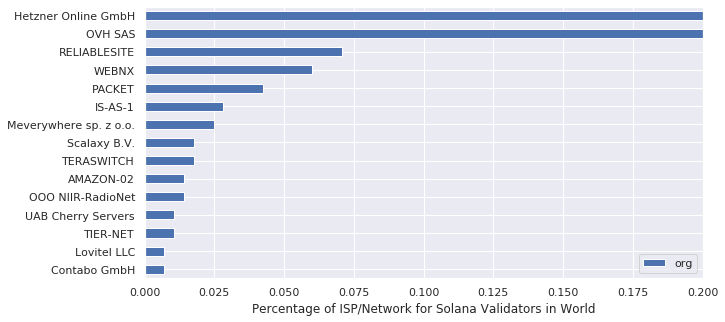

In [120]:

f, ax = plt.subplots(figsize=(10, 5))

plot = org.value_counts(normalize=True).nlargest(15).sort_values().plot.barh()
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, .20),ylabel="",
       xlabel="Percentage of ISP/Network for Solana Validators in World")
fig = plot.get_figure()
fig.savefig("figures/Solana-Validator-Node-ISP-Distribution.png")

In [45]:
node_df = sol_df
gdf = geopandas.GeoDataFrame(
    node_df, crs="epsg:4269", geometry=geopandas.points_from_xy(node_df.longitude, node_df.latitude))
gdf = gdf.fillna('')
#gdf.geometry.head()

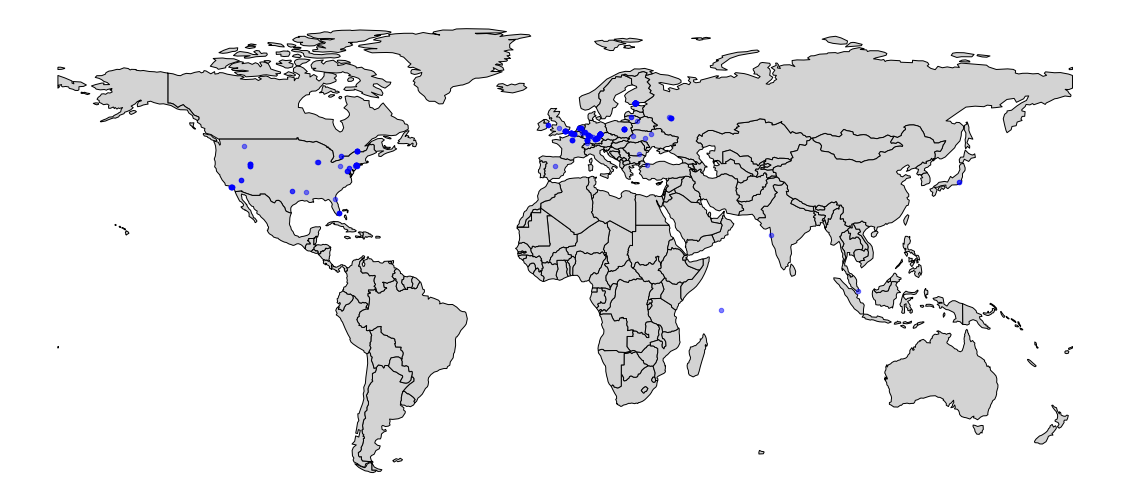

In [129]:

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[~world.continent.isin(['Antarctica'])]


ax = world.plot(color='lightgrey', linewidth=1, edgecolor='black', figsize=(20,10))

# We can now plot our ``GeoDataFrame``.
plot = gdf.plot(markersize=20, color='blue', alpha=0.5, ax=ax )
ax.axis('off')

plt.show()
fig = plot.get_figure()
fig.savefig("figures/Solana-Validator-World-Distribution.png")

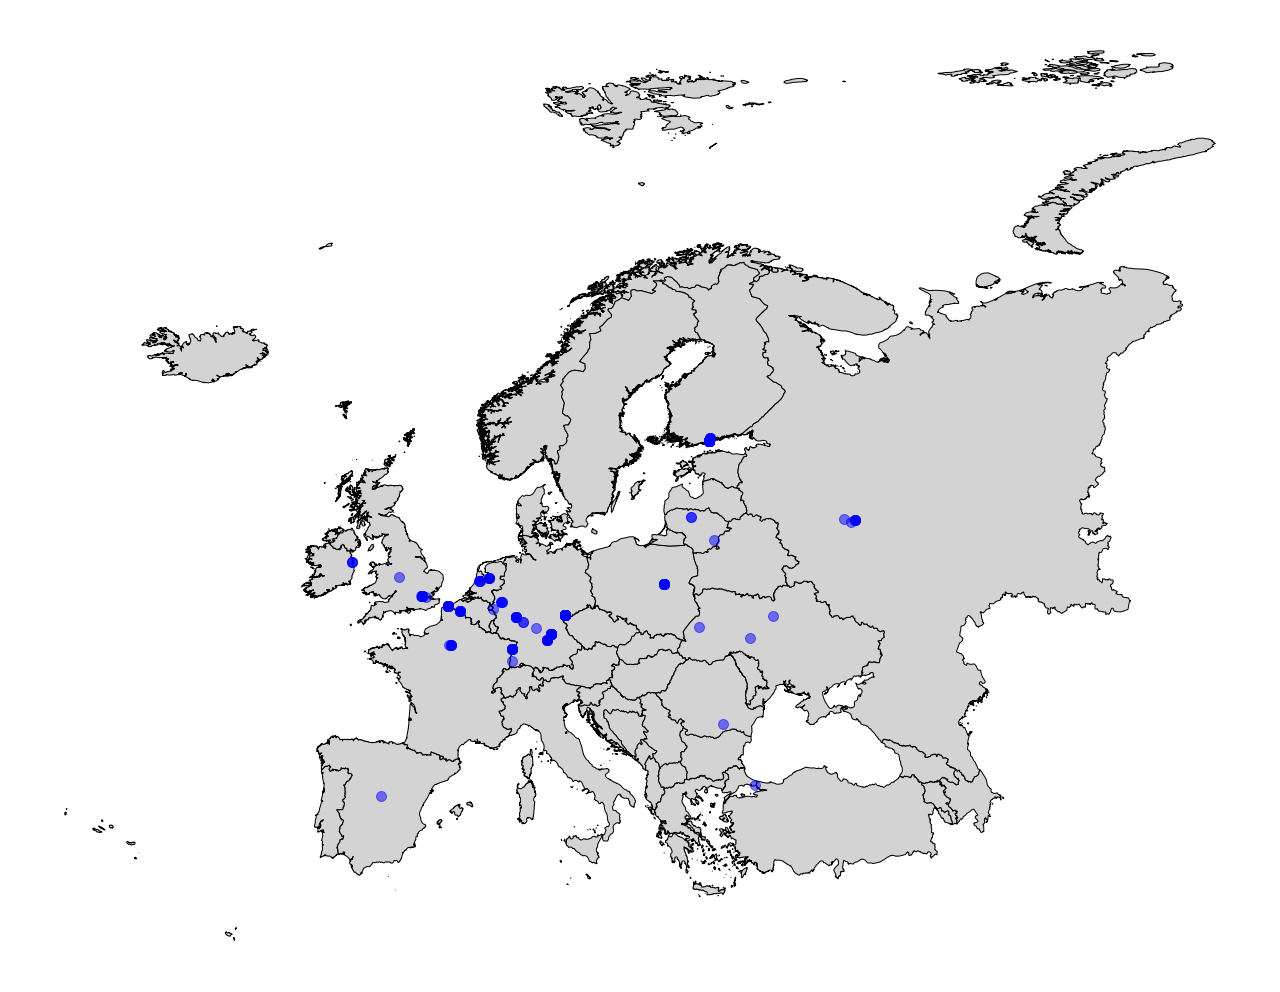

In [167]:
#europe = geopandas.read_file("shape-data/NUTS_RG_20M_2021_3857/NUTS_RG_20M_2021_3857.shp")
europe = geopandas.read_file("shape-data/europe-shape/Europe.shp")

gdf_eu = geopandas.GeoDataFrame(
    node_df, geometry=geopandas.points_from_xy(node_df.longitude, node_df.latitude))
gdf_eu = gdf.fillna('')


ax = europe.plot(color='lightgrey', linewidth=1, edgecolor='black', figsize=(50, 18))
eu_intersection = geopandas.overlay(gdf_eu.to_crs(4326), europe, how='intersection')
plot = eu_intersection.plot(markersize=100, color='blue', alpha=0.5, ax=ax)
ax.axis('off')
ax.set(xlabel="All Solana Validators in Europe")
plt.show()
fig = plot.get_figure()
fig.savefig("figures/solana-validators-in-europe.png")

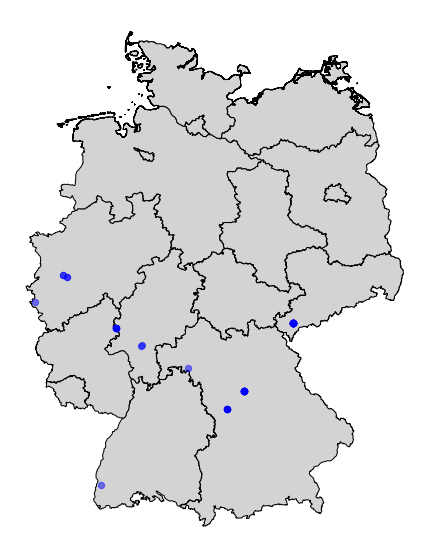

In [168]:
#german shapefile: https://www.eea.europa.eu/data-and-maps/data/eea-reference-grids-2/gis-files/germany-shapefile/at_download/file
gdf_de = gdf_eu[gdf_eu.country == "DE"]
germany = geopandas.read_file("shape-data/german-shp/DEU_adm1.shp")

ax = germany.plot(color='lightgrey', linewidth=1, edgecolor='black', figsize=(30, 10))
eu_intersection = geopandas.overlay(gdf_de.to_crs(4326), germany, how='intersection')
plot = eu_intersection.plot(markersize=40, color='blue', alpha=0.5, ax=ax)
ax.axis('off')
ax.set(xlabel="Solana Validators in Germany")
plt.show()
fig = plot.get_figure()
fig.savefig("figures/Solana-Validator-German-Distribution.png")

In [11]:

states = geopandas.read_file("shape-data/cb_2018_us_state_500k/cb_2018_us_state_500k.shp")
# Get rid of Guam, Mariana Islands and Virgin Islands
states = states[states.STATEFP.astype(int) < 60]
# Get rid of Hawaii and Alaska
states = states[~states.NAME.isin(['Hawaii', 'Alaska'])]
#states.tail(5)

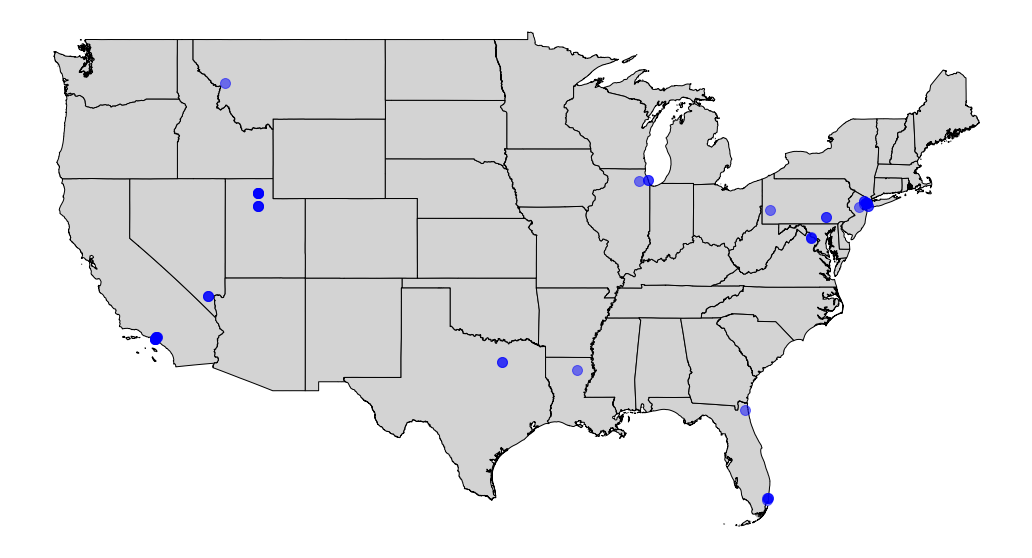

In [136]:
ax = states.plot(color='lightgrey', linewidth=1, edgecolor='black', figsize=(20,10))

# We can now plot our ``GeoDataFrame``.
#gdf.plot(markersize=10, color='pink', alpha=0.5, ax=ax)

us_intersection = geopandas.overlay(gdf, states, how='intersection')
plot = us_intersection.plot(markersize=100, color='blue', alpha=0.5, ax=ax)
ax.axis('off')
ax.set(xlabel="All Solana Validators in US")
plt.show()
fig = plot.get_figure()
fig.savefig("figures/Solana-Validator-USA-Distribution.png")

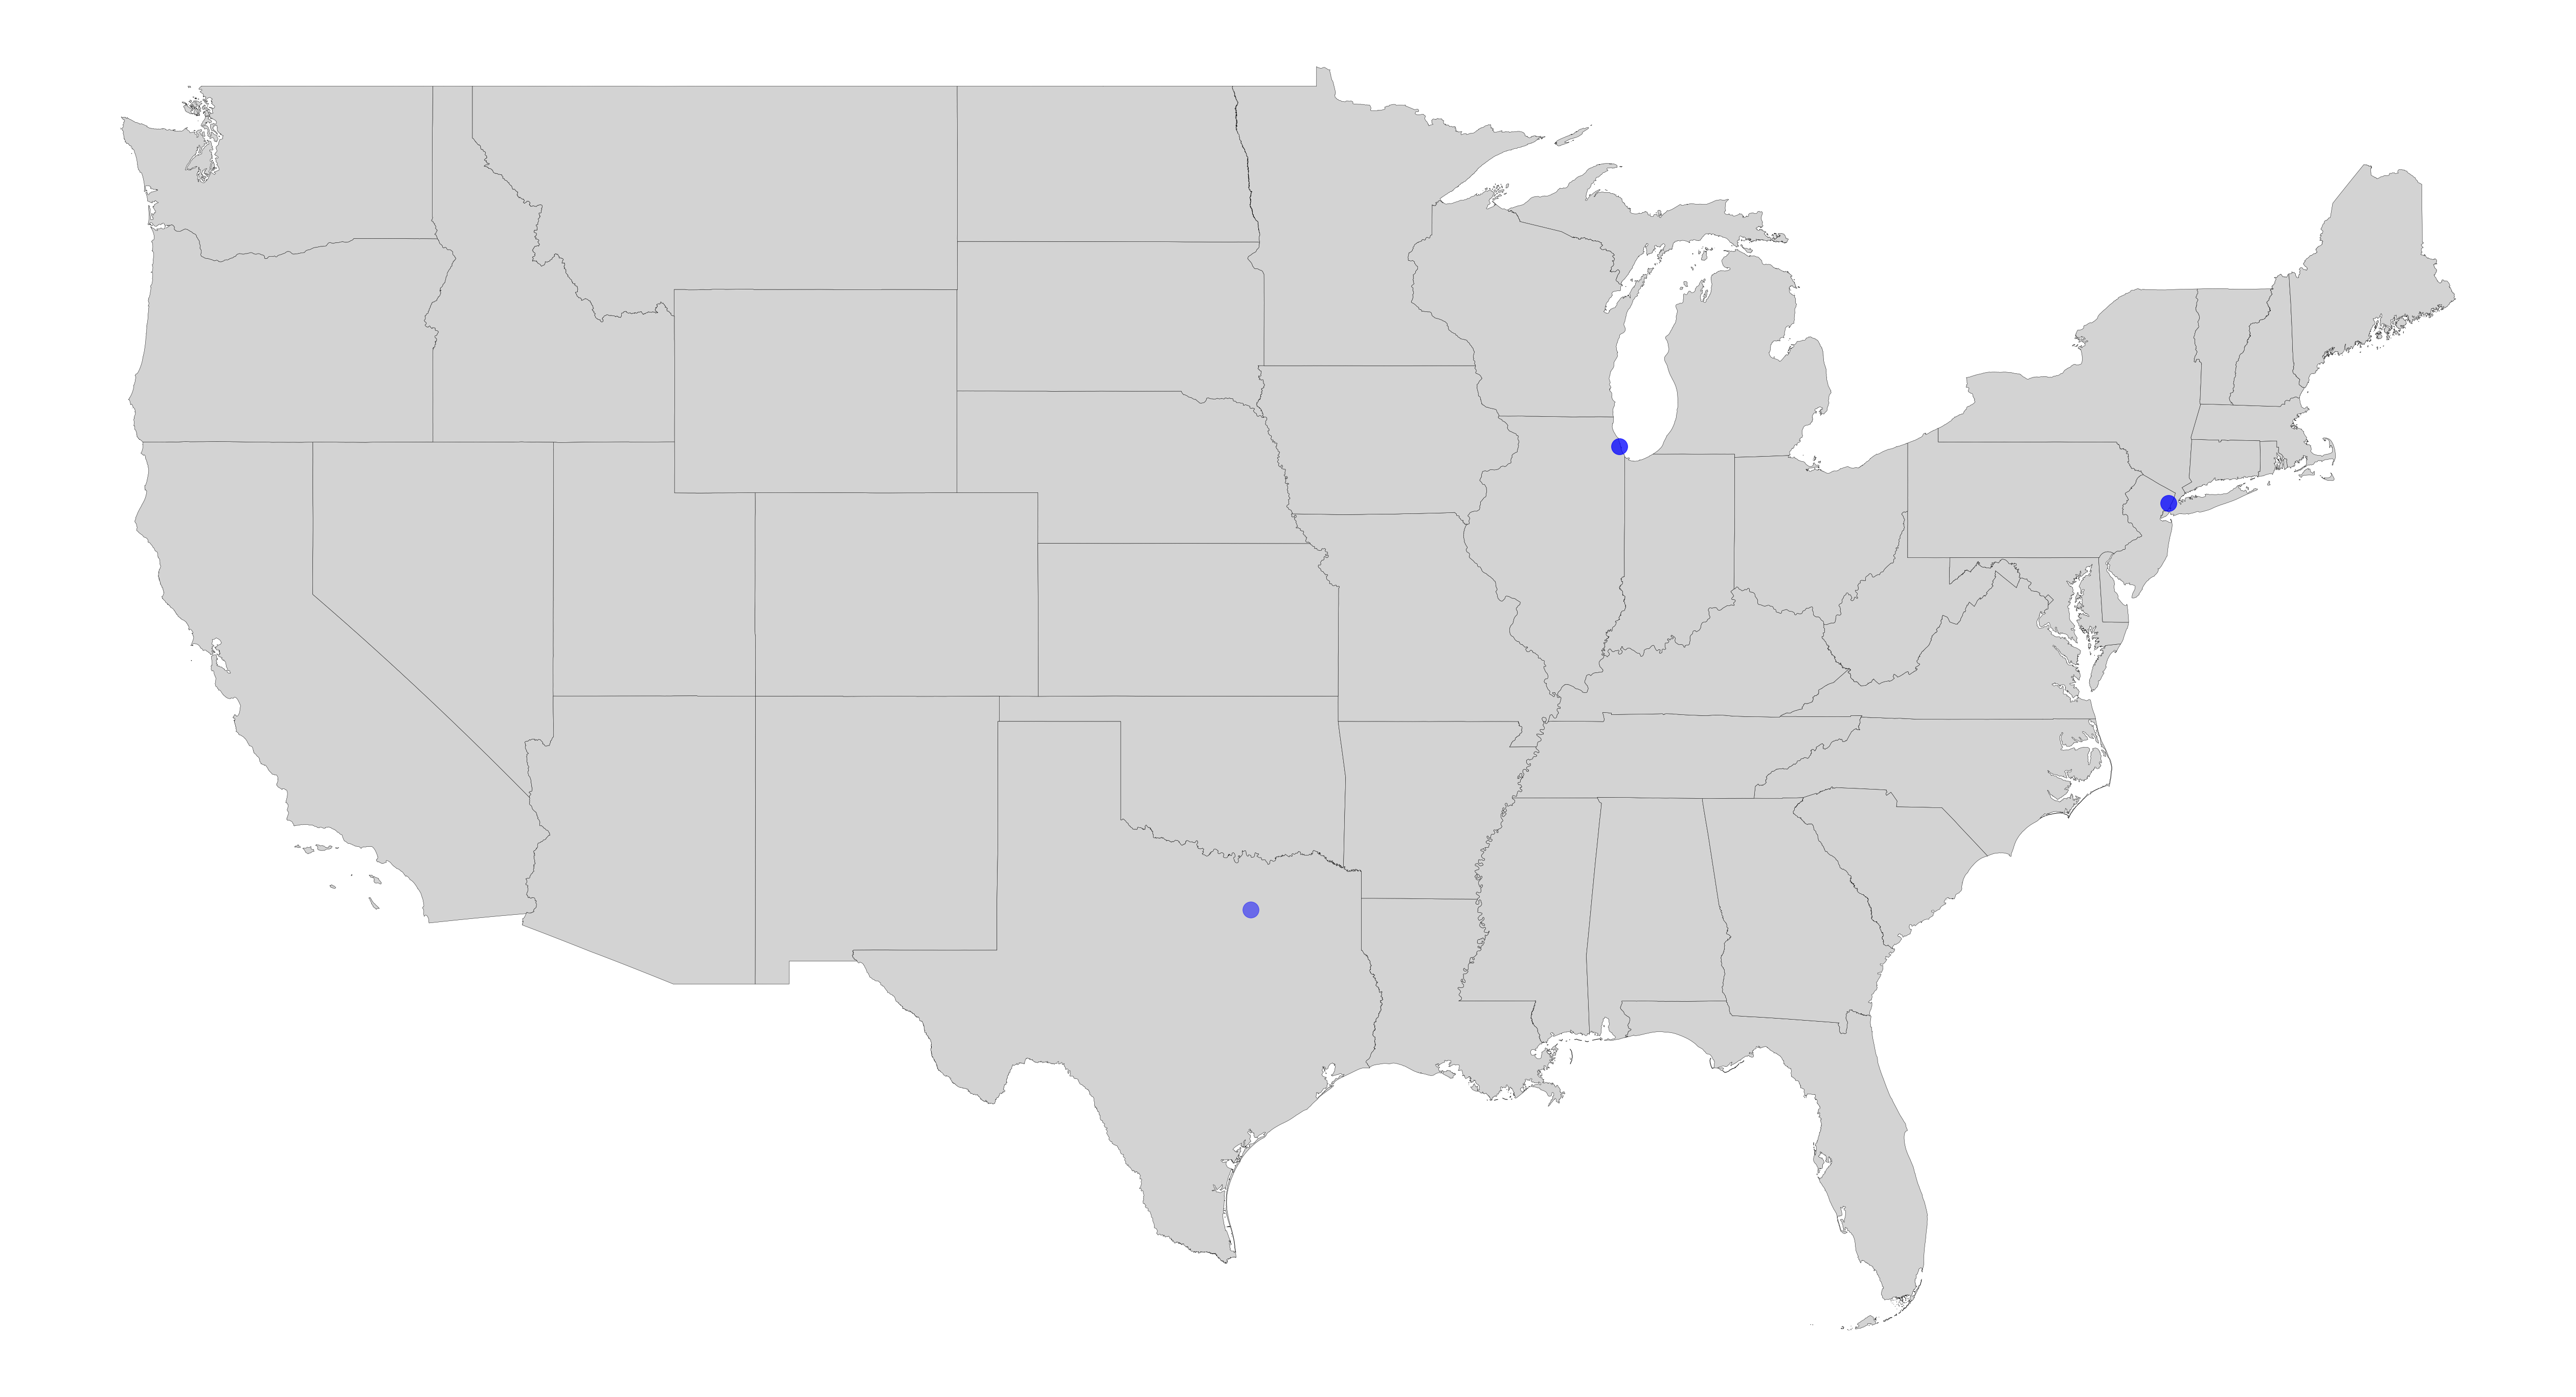

In [17]:
gdf = gdf.fillna('')
comcast_nodes = gdf[gdf["org"].str.contains('PACKET')]
comcast_intersection = geopandas.overlay(comcast_nodes, states, how='intersection')
ax = states.plot(color='lightgrey', linewidth=0.5, edgecolor='black', figsize=(150,50))
comcast_intersection.plot(markersize=1000, color='blue', alpha=0.5, ax=ax)
ax.axis('off')
#ax.set(xlabel="Comcast Peers in US")
plt.show()

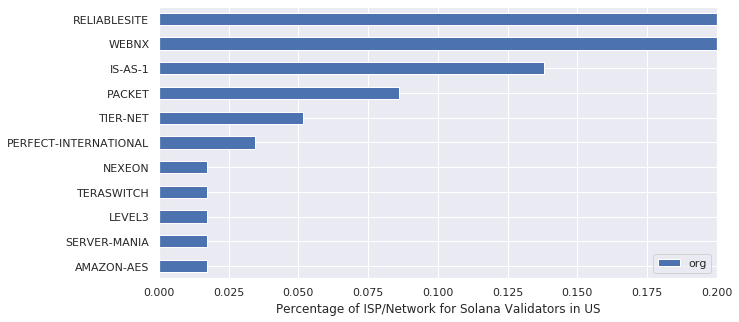

In [108]:
f, ax = plt.subplots(figsize=(10, 5))
plot = us_intersection["org"].value_counts(normalize=True).nlargest(15).sort_values().plot.barh()
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, .20),ylabel="",
       xlabel="Percentage of ISP/Network for Solana Validators in US")
fig = plot.get_figure()
fig.savefig("figures/Solana-Validator-USA-Distribution-barchart.png")

In [138]:
us_intersection["org"].value_counts(normalize=True).nlargest(10)

RELIABLESITE             0.310345
WEBNX                    0.293103
IS-AS-1                  0.137931
PACKET                   0.086207
TIER-NET                 0.051724
PERFECT-INTERNATIONAL    0.034483
AMAZON-AES               0.017241
SERVER-MANIA             0.017241
LEVEL3                   0.017241
TERASWITCH               0.017241
Name: org, dtype: float64

In [140]:
gdf_de.org.value_counts(normalize=True).nlargest(10)

Hetzner Online GmbH          0.800000
OVH SAS                      0.106667
Contabo GmbH                 0.026667
myLoc managed IT AG          0.026667
IP-Projects GmbH & Co. KG    0.013333
diva-e Datacenters GmbH      0.013333
PACKET                       0.013333
Name: org, dtype: float64

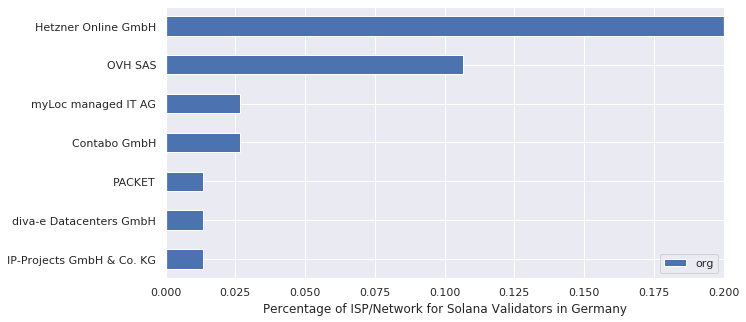

In [169]:
f, ax = plt.subplots(figsize=(10, 5))

plot = gdf_de.org.value_counts(normalize=True).nlargest(10).sort_values().plot.barh()
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, .20),ylabel="",
       xlabel="Percentage of ISP/Network for Solana Validators in Germany")
fig = plot.get_figure()
fig.savefig("figures/Solana-Validator-German-ISP-Distribution-bar.png")

In [173]:
sol_df.country.value_counts(normalize=True).nlargest(20).sort_values(ascending=False)

DE    0.265018
US    0.204947
FI    0.151943
FR    0.127208
GB    0.049470
PL    0.042403
CA    0.042403
NL    0.031802
RU    0.024735
LT    0.010601
UA    0.010601
IE    0.010601
JP    0.007067
IN    0.003534
RO    0.003534
ES    0.003534
SG    0.003534
TR    0.003534
SC    0.003534
Name: country, dtype: float64